In [ ]:
# Armin Panjehpour - 98101288 - Computational Intelligence - HW2 - Q.1

In [4]:
# libraries needed
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io
import tensorflow as tf
from tensorflow import keras

In [6]:
# Q.2

In [5]:
# Part.2.1 ------ K-Means Function
def k_means(input_data, cluster_numbers, initial_centers):
    
    flag_convergence = True
    centroids = np.copy(initial_centers)
    
    
    while flag_convergence:
        #print(flag_convergence)
        labels = tag_labels(input_data, centroids, cluster_numbers)
        # update the centroids
        for i in range (cluster_numbers):
            currentCentroid = centroids[:,i]
            updatedCentroid = update_centroids(labels, input_data, i+1)
            centroidsDistance = np.sqrt(sum(np.power(currentCentroid-updatedCentroid,2)))
            #print(centroidsDistance)
            if(centroidsDistance >= 0.001):
                centroids[:,i] = updatedCentroid
                flag_convergence = True
            else: 
                flag_convergence = False
                break
            
    return centroids, labels
            
    
    
    
    
    
def update_centroids(labels, data, currentCluster):
    dataOnCurrentCluster = data[:,np.where(labels == currentCluster)]
    dataOnCurrentCluster = dataOnCurrentCluster[:]
    updatedCentroid = [np.mean(dataOnCurrentCluster[0,:]), np.mean(dataOnCurrentCluster[1,:])]
    return updatedCentroid


def tag_labels(data, centers, clusterNum):
    
    labels = np.zeros((data.shape[1],))
    
    for i in range (data.shape[1]):
        minDistance = 10**10
        for j in range (clusterNum):
            currentCentroid = centers[:,j]
            distance = math.sqrt(sum(np.power((data[:,i]) - currentCentroid,2)))
            if(distance <= minDistance):
                minDistance = distance
                labels[i] = j+1
                
                
    return labels
        


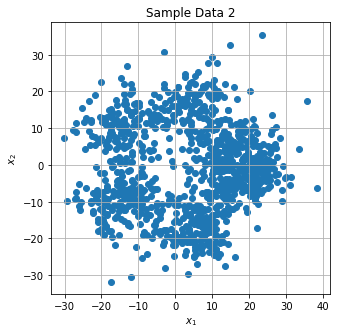

In [11]:
# Part.2.2.0 - Data Visualization
data = np.array(scipy.io.loadmat('SampleData2.mat')['DataNew']).T


fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(data[:,0],data[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2')
ax.grid(True)

data = data.T
plt.savefig('2.2.png')

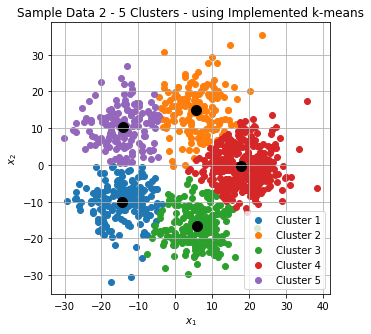

In [19]:
# Part.2.2.2 - K-means on data with 5 clusters

cluster_numbers = 5
initial_centers_x = np.random.uniform(min(data[0,:]), max(data[0,:]), cluster_numbers)
initial_centers_y = np.random.uniform(min(data[1,:]), max(data[1,:]), cluster_numbers)
initial_centers = np.squeeze(np.array([[initial_centers_x], [initial_centers_y]]))

centroids, labels = k_means(data, cluster_numbers, initial_centers)


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    dataClustered = data[:,np.where(labels == i+1)[0]]
    ax.scatter(dataClustered[0,:],dataClustered[1,:])
    ax.scatter(centroids[0,i],centroids[1,i], s = 100, c = 'black', label='_nolegend_')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 - 5 Clusters - using Implemented k-means')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']);
plt.savefig('2.3.png')

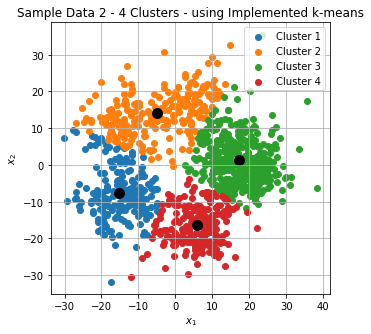

In [20]:
# Part.2.2.3.a - K-means on data with 4 clusters

cluster_numbers = 4
initial_centers_x = np.random.uniform(min(data[0,:]), max(data[0,:]), cluster_numbers)
initial_centers_y = np.random.uniform(min(data[1,:]), max(data[1,:]), cluster_numbers)
initial_centers = np.squeeze(np.array([[initial_centers_x], [initial_centers_y]]))

centroids, labels = k_means(data, cluster_numbers, initial_centers)


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    dataClustered = data[:,np.where(labels == i+1)[0]]
    ax.scatter(dataClustered[0,:],dataClustered[1,:])
    ax.scatter(centroids[0,i],centroids[1,i], s = 100, c = 'black', label='_nolegend_')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 - 4 Clusters - using Implemented k-means')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4']);
plt.savefig('2.4.png')

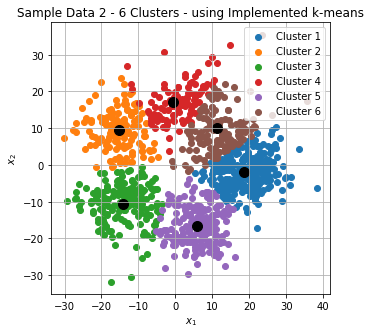

In [21]:
# Part.2.2.3.b - K-means on data with 6 clusters

cluster_numbers = 6
initial_centers_x = np.random.uniform(min(data[0,:]), max(data[0,:]), cluster_numbers)
initial_centers_y = np.random.uniform(min(data[1,:]), max(data[1,:]), cluster_numbers)
initial_centers = np.squeeze(np.array([[initial_centers_x], [initial_centers_y]]))

centroids, labels = k_means(data, cluster_numbers, initial_centers)


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    dataClustered = data[:,np.where(labels == i+1)[0]]
    ax.scatter(dataClustered[0,:],dataClustered[1,:])
    ax.scatter(centroids[0,i],centroids[1,i], s = 100, c = 'black', label='_nolegend_')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 - 6 Clusters - using Implemented k-means')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']);
plt.savefig('2.5.png')

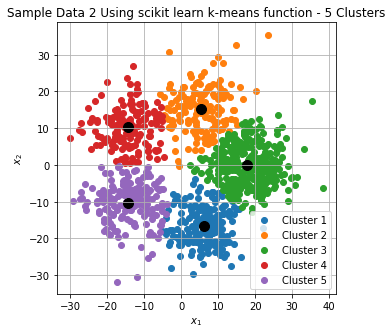

In [25]:
# Part.2.2.4.a - use internal scikit-learn K-means and compare it to our implementation - 5 Clusters
from sklearn.cluster import KMeans

cluster_numbers = 5
ClusteredData = KMeans(n_clusters = cluster_numbers, random_state = 0).fit(data.T)
clusteredLabels = ClusteredData.labels_ 
centroids = ClusteredData.cluster_centers_

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    ax.scatter(centroids[i,0], centroids[i,1], s = 100, c = 'black', label='_nolegend_')
    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using scikit learn k-means function - 5 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']);
plt.savefig('2.6.png')

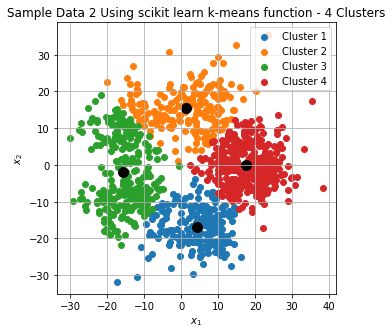

In [26]:
# Part.2.2.4.a - use internal scikit-learn K-means and compare it to our implementation - 4 Clusters
from sklearn.cluster import KMeans

cluster_numbers = 4
ClusteredData = KMeans(n_clusters = cluster_numbers, random_state = 0).fit(data.T)
clusteredLabels = ClusteredData.labels_ 
centroids = ClusteredData.cluster_centers_

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    ax.scatter(centroids[i,0], centroids[i,1], s = 100, c = 'black', label='_nolegend_')
    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using scikit learn k-means function - 4 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4']);
plt.savefig('2.7.png')

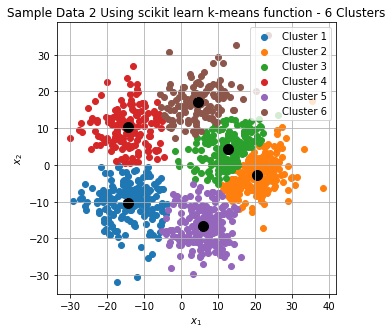

In [27]:
# Part.2.2.4.a - use internal scikit-learn K-means and compare it to our implementation - 6 Clusters
from sklearn.cluster import KMeans

cluster_numbers = 6
ClusteredData = KMeans(n_clusters = cluster_numbers, random_state = 0).fit(data.T)
clusteredLabels = ClusteredData.labels_ 
centroids = ClusteredData.cluster_centers_

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    ax.scatter(centroids[i,0], centroids[i,1], s = 100, c = 'black', label='_nolegend_')
    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using scikit learn k-means function - 6 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']);
plt.savefig('2.8.png')

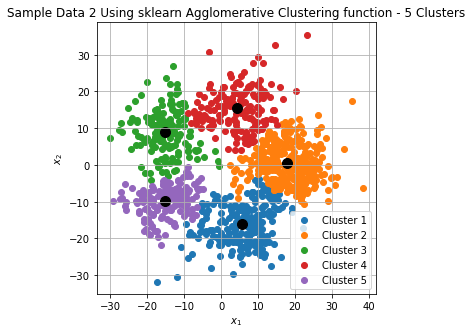

In [28]:
# Part.2.2.5.a - another clustering algorithm result - Agglomerative Clustering - 5 Clusters
from sklearn.cluster import AgglomerativeClustering


cluster_numbers = 5
clustering = AgglomerativeClustering(n_clusters = cluster_numbers).fit(data.T)
clusteredLabels = clustering.labels_ 


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    centroids = [np.mean(clusteredData[0,:]), np.mean(clusteredData[1,:])]
    ax.scatter(centroids[0], centroids[1], s = 100, c = 'black', label='_nolegend_')

    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using sklearn Agglomerative Clustering function - 5 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']);
plt.savefig('2.9.png')

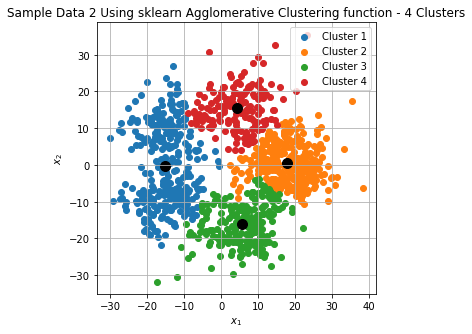

In [29]:
# Part.2.2.5.a - another clustering algorithm result - Agglomerative Clustering - 4 Clusters
from sklearn.cluster import AgglomerativeClustering


cluster_numbers = 4
clustering = AgglomerativeClustering(n_clusters = cluster_numbers).fit(data.T)
clusteredLabels = clustering.labels_ 


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    centroids = [np.mean(clusteredData[0,:]), np.mean(clusteredData[1,:])]
    ax.scatter(centroids[0], centroids[1], s = 100, c = 'black', label='_nolegend_')

    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using sklearn Agglomerative Clustering function - 4 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4']);
plt.savefig('2.10.png')

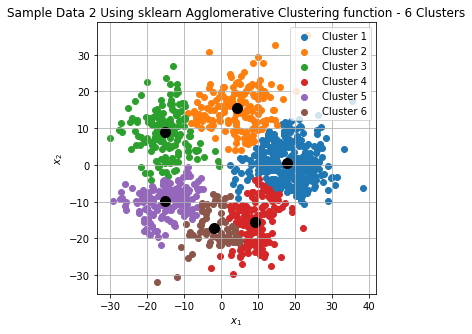

In [30]:
# Part.2.2.5.a - another clustering algorithm result - Agglomerative Clustering - 6 Clusters
from sklearn.cluster import AgglomerativeClustering


cluster_numbers = 6
clustering = AgglomerativeClustering(n_clusters = cluster_numbers).fit(data.T)
clusteredLabels = clustering.labels_ 


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    centroids = [np.mean(clusteredData[0,:]), np.mean(clusteredData[1,:])]
    ax.scatter(centroids[0], centroids[1], s = 100, c = 'black', label='_nolegend_')

    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using sklearn Agglomerative Clustering function - 6 Clusters')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']);
plt.savefig('2.11.png')

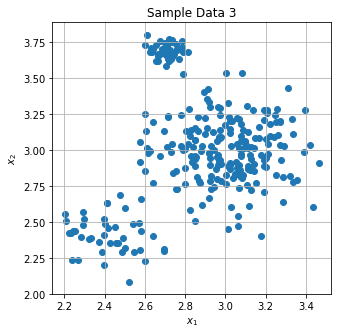

In [31]:
# Part.2.2.6.0 - run k-means, internal k-means and agglomerative clustering on sampleData.3
# Data Visualization
data = np.array(scipy.io.loadmat('SampleData3.mat')['DataNew2']).T


fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(data[:,0],data[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 3')
ax.grid(True)

data = data.T
plt.savefig('2.12.png')

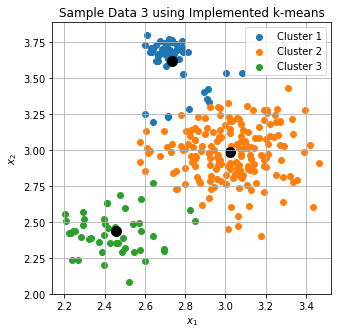

In [38]:
# Part.2.2.6.1 - implemented k-means 

cluster_numbers = 3
initial_centers_x = np.random.uniform(min(data[0,:]), max(data[0,:]), cluster_numbers)
initial_centers_y = np.random.uniform(min(data[1,:]), max(data[1,:]), cluster_numbers)
initial_centers = np.squeeze(np.array([[initial_centers_x], [initial_centers_y]]))

centroids, labels = k_means(data, cluster_numbers, initial_centers)

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    dataClustered = data[:,np.where(labels == i+1)[0]]
    ax.scatter(dataClustered[0,:],dataClustered[1,:])
    ax.scatter(centroids[0,i],centroids[1,i], s = 100, c = 'black', label='_nolegend_')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 3 using Implemented k-means')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3']);
plt.savefig('2.13.png')

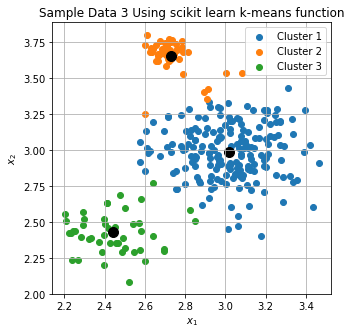

In [33]:
# Part.2.2.6.1 - scikit learn k-means 
from sklearn.cluster import KMeans

cluster_numbers = 3
ClusteredData = KMeans(n_clusters = cluster_numbers, random_state = 0).fit(data.T)
clusteredLabels = ClusteredData.labels_ 
centroids = ClusteredData.cluster_centers_

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    ax.scatter(centroids[i,0], centroids[i,1], s = 100, c = 'black', label='_nolegend_')
    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 3 Using scikit learn k-means function')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']);
plt.savefig('2.14.png')

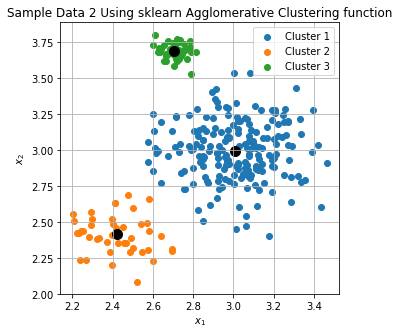

In [36]:
# Part.2.2.6.3 - scikit learn k-means 
from sklearn.cluster import AgglomerativeClustering


cluster_numbers = 3
clustering = AgglomerativeClustering(n_clusters = cluster_numbers).fit(data.T)
clusteredLabels = clustering.labels_ 


fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range (cluster_numbers):
    clusteredData = data[:,np.where(clusteredLabels == i)[0]]
    ax.scatter(clusteredData[0,:], clusteredData[1,:])
    centroids = [np.mean(clusteredData[0,:]), np.mean(clusteredData[1,:])]
    ax.scatter(centroids[0], centroids[1], s = 100, c = 'black', label='_nolegend_')

    

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 2 Using sklearn Agglomerative Clustering function')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2','Cluster 3']);
plt.savefig('2.15.png')